In [1]:
experimento = 'experimento_02'
sp_str      = '50'

In [2]:
%rm *.eps
# %ls ../etc

In [3]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import matplotlib
import scipy
print('Matplotlib Version:{}'.format(matplotlib.__version__))
print('Numpy Version:{}'.format(np.__version__))
print('Pandas Version:{}'.format(pd.__version__))
print('Scipy Version:{}'.format(scipy.__version__))

Matplotlib Version:3.3.2
Numpy Version:1.19.2
Pandas Version:1.0.5
Scipy Version:1.5.0


In [5]:
motor_d = pd.read_csv('../etc/motor_direito_'+sp_str+ '_'+experimento+ '.csv')
motor_e = pd.read_csv('../etc/motor_esquerdo_'+sp_str+'_'+experimento+'.csv')

motor_d_c = pd.read_csv('../etc/control_motor_direito_'+sp_str+ '_'+experimento+ '.csv')
motor_e_c = pd.read_csv('../etc/control_motor_esquerdo_'+sp_str+'_'+experimento+'.csv')

sp = motor_e_c['SET_POINT'][0]

t  = motor_e['TIME']
we_raw = motor_e['OMEGA_RAW'] 
wd_raw = motor_d['OMEGA_RAW'] 

we = motor_e['OMEGA_FILTERED'] 
wd = motor_d['OMEGA_FILTERED'] 

t_c = motor_e_c['TIME']
we_c= motor_e_c['OMEGA_FILTERED'] 
wd_c= motor_d_c['OMEGA_FILTERED'] 

wref = motor_e_c['SET_POINT']*motor_e_c['OMEGA_MAX']


R_e  = motor_e['OMEGA_RAW'][motor_e['TIME'] >= motor_e['TAU']*10].var()
R_d  = motor_d['OMEGA_RAW'][motor_d['TIME'] >= motor_d['TAU']*10].var()

In [6]:
def func(t,K,Tm):
    return K*(1.0 - np.exp(-t/Tm))

In [7]:
we_opt, _   = curve_fit(func, t, we, bounds=([-10000., 0.01], [10000., 1000]))
we_c_opt,_ = curve_fit(func, t, we_c, bounds=([-10000., 0.01], [10000., 1000]))

wd_opt,_   = curve_fit(func, t, wd, bounds=([-10000., 0.01], [10000., 1000]))
wd_c_opt,_ = curve_fit(func, t, wd_c, bounds=([-10000., 0.01], [10000., 1000]))


we_opt_raw    = [motor_e['K'][0], motor_e['TAU'][0]]
wd_opt_raw    = [motor_d['K'][0], motor_d['TAU'][0]]

we_c_opt_raw,_  = curve_fit(func, t, motor_d_c['OMEGA_RAW'], bounds=([-10000., 0.01], [10000., 1000]))
wd_c_opt_raw,_  = curve_fit(func, t, motor_d_c['OMEGA_RAW'], bounds=([-10000., 0.01], [10000., 1000]))

In [8]:
R_e

205.1687307516669

In [9]:
R_d

562.7624344445943

In [10]:
# data = np.array([
# [1905.72803 , 1.00000],
# [1821.21313 , 0.95750],
# [1729.47572 , 0.91500],
# [1653.03481 , 0.87250],
# [1616.04560 , 0.83000],
# [1580.67555 , 0.78750],
# [1480.13788 , 0.74500],
# [1376.98560 , 0.70250],
# [1230.54941 , 0.66000],
# [1111.08493 , 0.61750],
# [989.78975 , 0.57500],
# [877.41730 , 0.53250],
# [785.88934 , 0.49000],
# [678.45646 , 0.44750],
# [604.61752 , 0.40500],
# [507.48609 , 0.36250],
# [371.34665 , 0.32000],
# [210.34399 , 0.27750],
# [90.20955 , 0.23500],
# [0.00000 , 0.19250]])
# x = data[:,0]
# y = data[:,1]

In [11]:
# def _calcTau(t,w, wss):
#     Sxx = 0.0
#     Sxy = 0.0
#     y = 0.0
#     for i in range(len(t)):
#         if (abs(w[i]) > 0.2*abs(wss)) and (abs(w[i]) < 0.8*abs(wss)):
#             y = -np.log(1.0 - w[i]/wss);
#             Sxy+= t[i]*y;
#             Sxx+= t[i]*t[i];
#     return Sxx/Sxy

# def line(x, a,b):
#     return x*a + b

# pop, pcov = curve_fit(line, x, y, bounds=([0, 0], [np.inf, 1.0]))
# print(pop,pcov)

# plt.plot(x,y, label='data')
# plt.plot(x,line(x,pop[0], pop[1]), '--k')
# plt.ylim([0,1])
# plt.show()

In [12]:
# def _calcTau(t,w, wss):
#     Sxx = 0.0
#     Sxy = 0.0
#     y = 0.0
#     for i in range(len(t)):
#         if (abs(w[i]) > 0.2*abs(wss)) and (abs(w[i]) < 0.8*abs(wss)):
#             y = -np.log(1.0 - w[i]/wss);
#             Sxy+= t[i]*y;
#             Sxx+= t[i]*t[i];
#     return Sxx/Sxy

# data = np.array([[0.00001, 0.00000],
# [0.00419, 0.00000],
# [0.00919, 1.39470],
# [0.01418, 1.40516],
# [0.01919, 325.16614],
# [0.02419, 325.16614],
# [0.02918, 414.23954],
# [0.03419, 709.00308],
# [0.03918, 841.12253],
# [0.04419, 953.29773]])

# x = data[:,0]
# y = data[:,1]

## TESTAGEM DA CALIBRAÇÃO

In [13]:
motor_e.head()

,MOTOR,CONTROLLER,SET_POINT,OMEGA_MAX,K,TAU,FORWARD_KP,BACK_KP,FORWARD_ANG_COEF,FORWARD_LIN_COEF,BACK_ANG_COEF,BACK_LIN_COEF,TIME,OMEGA_RAW,OMEGA_FILTERED,OMEGA_PREDICTED,K_GAIN,PREDIC_ERR,MEASURE_ERR
0,0,0,0.5,2625.29,3236.8,0.076151,0.000137,0.000185,0.000287,0.09487,0.000274,-0.087521,0.000003,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0.5,2625.29,3236.8,0.076151,0.000137,0.000185,0.000287,0.09487,0.000274,-0.087521,0.001460,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0.5,2625.29,3236.8,0.076151,0.000137,0.000185,0.000287,0.09487,0.000274,-0.087521,0.003458,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0.5,2625.29,3236.8,0.076151,0.000137,0.000185,0.000287,0.09487,0.000274,-0.087521,0.005459,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0.5,2625.29,3236.8,0.076151,0.000137,0.000185,0.000287,0.09487,0.000274,-0.087521,0.007458,0.0,0.0,0.0,0.0,0.0,0


In [14]:
motor_d.head()

,MOTOR,CONTROLLER,SET_POINT,OMEGA_MAX,K,TAU,FORWARD_KP,BACK_KP,FORWARD_ANG_COEF,FORWARD_LIN_COEF,BACK_ANG_COEF,BACK_LIN_COEF,TIME,OMEGA_RAW,OMEGA_FILTERED,OMEGA_PREDICTED,K_GAIN,PREDIC_ERR,MEASURE_ERR
0,1,0,0.5,2625.29,3047.72,0.065716,0.000124,0.000082,0.000293,0.1044,0.000303,-0.079345,0.000002,0.0,0.0,0.0,0.0,60.0,1200
1,1,0,0.5,2625.29,3047.72,0.065716,0.000124,0.000082,0.000293,0.1044,0.000303,-0.079345,0.001746,0.0,0.0,0.0,0.0,60.0,1200
2,1,0,0.5,2625.29,3047.72,0.065716,0.000124,0.000082,0.000293,0.1044,0.000303,-0.079345,0.003745,0.0,0.0,0.0,0.0,60.0,1200
3,1,0,0.5,2625.29,3047.72,0.065716,0.000124,0.000082,0.000293,0.1044,0.000303,-0.079345,0.005745,0.0,0.0,0.0,0.0,60.0,1200
4,1,0,0.5,2625.29,3047.72,0.065716,0.000124,0.000082,0.000293,0.1044,0.000303,-0.079345,0.007753,0.0,0.0,0.0,0.0,60.0,1200


In [15]:
print('Motor Esquerdo')
print('| Km | Tm | R | Kp |')
print('| {:.2f} | {:.2e} | {:.2f} | {:.2e}|'.format(motor_e['K'][0],  motor_e['TAU'][0], R_e, motor_e['FORWARD_KP'][0]))

Motor Esquerdo
| Km | Tm | R | Kp |
| 3236.80 | 7.62e-02 | 205.17 | 1.37e-04|


In [16]:
print('Motor Direito')
print('| Km | Tm | R | Kp |')
print('| {:.2f} | {:.2e} | {:.2f} | {:.2e}|'.format(motor_d['K'][0],  motor_d['TAU'][0], R_d, motor_d['FORWARD_KP'][0]))

Motor Direito
| Km | Tm | R | Kp |
| 3047.72 | 6.57e-02 | 562.76 | 1.24e-04|


In [17]:
def reta(x, a, b):
    return a*x + b 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


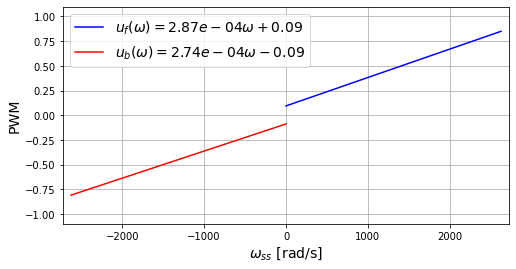

In [18]:
# Curva PWM x Omega
# Motor esquerdo
wmax = motor_e['OMEGA_MAX'][0]
w    = np.linspace(0,wmax, 10)
ae_f = motor_e['FORWARD_ANG_COEF'][0]
be_f = motor_e['FORWARD_LIN_COEF'][0]
ae_b = motor_e['BACK_ANG_COEF'][0]
be_b = motor_e['BACK_LIN_COEF'][0]

ue_f = reta(w,ae_f, be_f)
ue_b = reta(-w,ae_b, be_b)

plt.figure(figsize=(8,4))
# plt.title(r'Curva $u(\omega_{ss})$ do Motor Esquerdo')

plt.plot(w, ue_f, 'b', label= r'$u_{f}(\omega) = %.2e\omega + %.2f$'%(ae_f, be_f))
plt.plot(-w, ue_b, 'r',label= r'$u_{b}(\omega) = %.2e\omega  %.2f$'%(ae_b, be_b))

plt.ylabel('PWM',fontsize=14)
plt.xlabel(r'$\omega_{ss}$ [rad/s]',fontsize=14)
plt.grid(True)
plt.ylim([-1.1,1.1])
plt.xlim([-wmax-100,wmax+100])
plt.legend(prop={'size':14})

# plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

plt.savefig('curva_feedforward_esquerdo' + sp_str + '.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


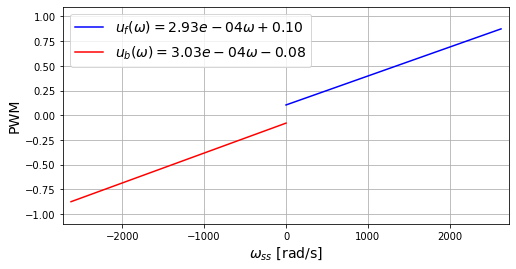

In [19]:
# Curva PWM x Omega
# Motor direito
wmax = motor_d['OMEGA_MAX'][0]
w    = np.linspace(0,wmax, 10)
ad_f = motor_d['FORWARD_ANG_COEF'][0]
bd_f = motor_d['FORWARD_LIN_COEF'][0]
ad_b = motor_d['BACK_ANG_COEF'][0]
bd_b = motor_d['BACK_LIN_COEF'][0]

ud_f = reta(w,ad_f, bd_f)
ud_b = reta(-w,ad_b, bd_b)

plt.figure(figsize=(8,4))
# plt.title(r'Curva $u(\omega_{ss})$ do Motor Direito')

plt.plot(w, ud_f, 'b', label= r'$u_{f}(\omega) = %.2e\omega + %.2f$'%(ad_f, bd_f))
plt.plot(-w, ud_b, 'r',label= r'$u_{b}(\omega) = %.2e\omega  %.2f$'%(ad_b, bd_b))

plt.ylabel('PWM',fontsize=14)
plt.xlabel(r'$\omega_{ss}$ [rad/s]',fontsize=14)
plt.grid(True)
plt.ylim([-1.1,1.1])
plt.xlim([-wmax-100,wmax+100])
plt.legend(prop={'size':14})


# plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

plt.savefig('curva_feedforward_direito' + sp_str + '.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


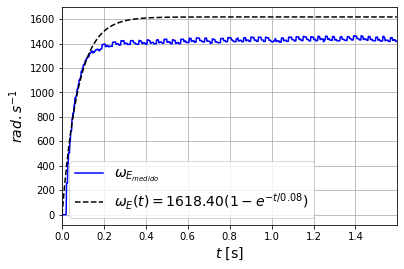

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


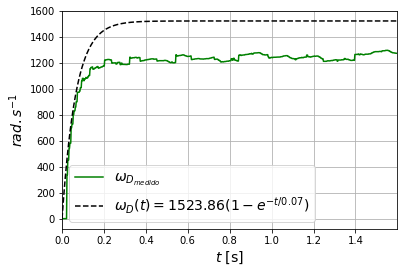

In [20]:
figsize=(10,5)
# plt.title('Comportamento Esperado vs Velocidade Medida')
plt.plot(t, we_raw, '-b', label=r'$\omega_{E_{medido}}$')
plt.plot(t, func(t,sp*we_opt_raw[0],we_opt_raw[1]), '--k', label=r'$\omega_E(t) = %.2f\left( 1 - e^{-t/%.2f}\right)$'%(sp*we_opt_raw[0],we_opt_raw[1]))



plt.xlim([0, motor_e_c['TIME'].max()])
plt.ylabel(r'$rad.s^{-1}$',fontsize=14)
plt.xlabel(r'$t$ [s]',fontsize=14)
plt.grid(True)
plt.legend(prop={'size':14})

plt.savefig('regressao_vs_medido_esquerdo' + sp_str + '.eps', format='eps')
plt.show()

figsize=(10,5)
# plt.title('Comportamento Esperado vs Velocidade Medida')
plt.plot(t, wd_raw, '-g', label=r'$\omega_{D_{medido}}$')
plt.plot(t, func(t,sp*wd_opt_raw[0],wd_opt_raw[1]), '--k', label=r'$\omega_D(t) = %.2f\left( 1 - e^{-t/%.2f}\right)$'%(sp*wd_opt_raw[0],wd_opt_raw[1]))

plt.xlim([0, motor_e_c['TIME'].max()])
plt.ylabel(r'$rad.s^{-1}$',fontsize=14)
plt.xlabel(r'$t$ [s]',fontsize=14)
plt.grid(True)
plt.legend(prop={'size':14})

plt.savefig('regressao_vs_medido_direito' + sp_str + '.eps', format='eps')
plt.show()

## TESTAGEM DO FILTRO

## Teste offline: Filtro de Kalman

In [21]:
# plt.figure(num=1,figsize=(15,5))
# plt.title('Função de aproximação para o motor Esquerdo e Ganho do sistema filtrado')
# plt.plot(t, motor_e['OMEGA_RAW'], '-y', label=r'$\omega_{e_{raw}}$')
# plt.plot(t, we, '-b', label=r'$\omega_e$')
# plt.plot(t, func(t,Ke,Tme), '--k', label=r'$\omega(t) = %.2f\left( 1 - e^{-t/%.2f}\right)$'%(Ke,Tme))
# # plt.plot(t, func(t,x_k,motor_e['TAU'][0]), '--g', label=r'$\omega_{cal}(t) = %.2f\left( 1 - e^{-t/%.2f}\right)$'%(x_k,motor_e['TAU'][0]))
# plt.plot(t, func(t,motor_e['SET_POINT']*motor_e['K'][0],motor_e['TAU'][0]), '--r', label=r'$\omega_{cal_{orig}}(t) = %.2f\left( 1 - e^{-t/%.2f}\right)$'%(motor_e['K'][0]*motor_e['SET_POINT'][0],motor_e['TAU'][0]))

# plt.xlim([0, motor_e_c['TIME'].max()])
# plt.ylabel(r'$rad.s^{-1}$')
# plt.xlabel(r'$t$ [s]')
# plt.grid(True)
# plt.legend()
# plt.show()

In [22]:
p0 = 100
r  = 1200
q  = 10

In [23]:
# # inicialização
# # r = motor_e['OMEGA_RAW'][t >= Tme*5].var() #incerteza da medição
# #############################################################
# w_mean  = np.zeros_like(t)    #omega predito
# w_check = np.zeros_like(t)    #omega predito
# w_hat   = np.zeros_like(t)    #melhor estimativa de oemga (omega filtrado)
# p_check = np.zeros_like(t)    #incerteza de omega
# p_hat   = np.zeros_like(t)
# K = np.zeros_like(t)          #ganho do filtro

# p_check[0] = p_hat[0] = p0
# ##############################################################
# #input
# Tm= motor_e['TAU'][0]
# Kgain= motor_e['K'][0]
# u = motor_e['SET_POINT'][0]*Kgain

# for i in range(1, len(t)):
#     # medição
#     wz = motor_e['OMEGA_RAW'][i]
#     w_mean[i] = (w_mean[i-1] + wz)/2.0

#     predição
#     w_check[i] = w_hat[i-1] + (u - w_hat[i-1])*(1.0 - np.exp(-(t[i]- t[i-1])/Tm))
#     p_check[i] = p_hat[i-1] + q

#     # atualização
#     K[i] = p_check[i]/(p_check[i]+r)
#     w_hat[i] = w_check[i] + K[i]*(wz - w_check[i])
#     p_hat[i] = (1 - K[i])*p_check[i]

In [24]:
# plt.figure(figsize=(10, 5), dpi=100)

# # plt.plot(t, w_check, '-b', label=r'$\check{\omega}(t)$')

# plt.plot(t, w_hat, '-g', label=r'$\hat{\omega}(t)$')

# plt.plot(t, motor_e['OMEGA_RAW'], '-k', label=r'$\omega_{raw}(t)$')

# # plt.plot(t, w_mean, '-y', label=r'$\omega_{mean}(t)$')

# # plt.plot(t, motor_e['OMEGA_FILTERED'], '-r', label=r'$\omega_{filtered}(t)$')


# plt.title('Teste filtro de Kalman para o Motor Esquerdo')
# plt.xlim([0, motor_e_c['TIME'].max()])
# plt.ylabel(r'$rad/s$');
# plt.xlabel(r'$t(s)$');
# plt.legend();
# plt.grid(True)
# plt.show();

In [25]:
# # inicialização
# # p0 = 60.0
# # r = motor_d['OMEGA_RAW'][t >= Tme*5].var() #incerteza da medição
# # q = 10  #bias da incerteza (procurar uma definição mais adequada)
# #############################################################
# w_mean  = np.zeros_like(t)    #omega predito
# w_check = np.zeros_like(t)    #omega predito
# w_hat   = np.zeros_like(t)    #melhor estimativa de oemga (omega filtrado)
# p_check = np.zeros_like(t)    #incerteza de omega
# p_hat   = np.zeros_like(t)
# K = np.zeros_like(t)          #ganho do filtro

# p_check[0] = p_hat[0] = p0
# ##############################################################
# #input
# Tm= motor_d['TAU'][0]
# Kgain= motor_d['K'][0]
# u = motor_d['SET_POINT'][0]*Kgain

# for i in range(1, len(t)):
#     # medição
#     wz = motor_d['OMEGA_RAW'][i]
#     w_mean[i] = (w_mean[i-1] + wz)/2.0

#     # predição
#     w_check[i] = w_hat[i-1] + (u - w_hat[i-1])*(1.0 - np.exp(-(t[i]- t[i-1])/Tm))
#     p_check[i] = p_hat[i-1] + q

#     # atualização
#     K[i] = p_check[i]/(p_check[i]+r)
#     w_hat[i] = w_check[i] + K[i]*(wz - w_check[i])
#     p_hat[i] = (1 - K[i])*p_check[i]

In [26]:
# plt.figure(figsize=(10, 5), dpi=100)

# # plt.plot(t, w_check, '-b', label=r'$\check{\omega}(t)$')

# plt.plot(t, w_hat, '-g', label=r'$\hat{\omega}(t)$')

# plt.plot(t, wd_raw, '-k', label=r'$\omega_{raw}(t)$')

# plt.plot(t, w_mean, '-y', label=r'$\omega_{mean}(t)$')

# plt.plot(t, wd, '-r', label=r'$\omega_{filtered}(t)$')

# plt.title('Teste filtro de Kalman para o Motor Direito')
# plt.xlim([0, motor_e_c['TIME'].max()])
# plt.ylabel(r'$rad/s$');
# plt.xlabel(r'$t(s)$');
# plt.legend();
# plt.grid(True)
# plt.show();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


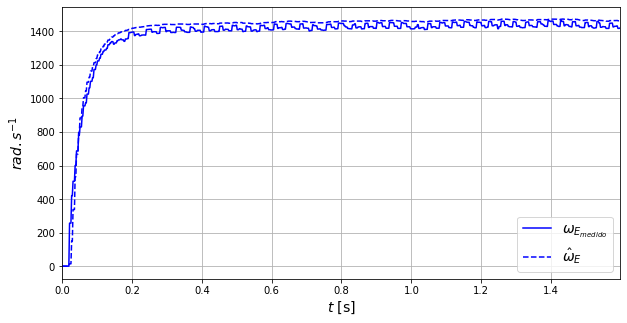

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


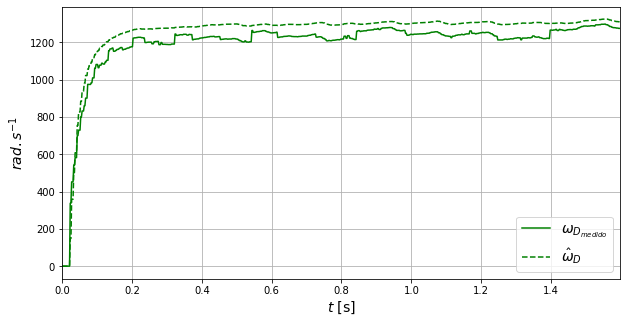

In [27]:
# Teste Com vs Sem Filtro
# Sem controlador
plt.figure(figsize=(10,5))
# plt.title('Com Filtro vs Sem Filtro')

plt.plot(t, we_raw, '-b', label=r'$\omega_{E_{medido}}$')
plt.plot(t, we, '--b', label=r'$\hat{\omega}_{E}$')

plt.xlim([0, motor_e['TIME'].max()])
plt.ylabel(r'$rad.s^{-1}$',fontsize=14)
plt.xlabel(r'$t$ [s]',fontsize=14)
plt.grid(True)
plt.legend(prop={'size':14})

plt.savefig('filtro_vs_sem_filtro_esquerdo' + sp_str + '.eps', format='eps')
plt.show()

plt.figure(figsize=(10,5))
# plt.title('Com Filtro vs Sem Filtro')

plt.plot(t, wd_raw, '-g', label=r'$\omega_{D_{medido}}$')
plt.plot(t, wd, '--g', label=r'$\hat{\omega}_{D}$')

plt.xlim([0, motor_e['TIME'].max()])
plt.ylabel(r'$rad.s^{-1}$',fontsize=14)
plt.xlabel(r'$t$ [s]',fontsize=14)
plt.grid(True)
plt.legend(prop={'size':14})


plt.savefig('filtro_vs_sem_filtro_direito' + sp_str + '.eps', format='eps')
plt.show()

## TESTAGEM DO Controlador

### CONTROLE COM FILTRO VS CONTROLE SEM FILTRO

In [28]:
# Esse grafico seria informativo se fosse o controle usando o filtro vs o controle sem usar o filtro

# plt.figure(figsize=(15,5))
# plt.title('Ambos os motores | controlador ligado | Com Filtro x Sem Filtro')
# plt.plot(t_c, we_c, '--b', label=r'$\omega_e$')
# plt.plot(t_c, wd_c, '--g', label=r'$\omega_d$')
# plt.plot(t_c, motor_e_c['OMEGA_RAW'], '-b', label=r'$\omega_{e_{raw}}$')
# plt.plot(t_c, motor_d_c['OMEGA_RAW'], '-g', label=r'$\omega_{d_{raw}}$')

# plt.xlim([0, motor_e_c['TIME'].max()])
# plt.ylabel(r'$rad.s^{-1}$')
# plt.xlabel(r'$t$ [s]')
# plt.grid(True)
# plt.legend()
# plt.show()

### CONTROLADOR VS SEM CONTROLADOR

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


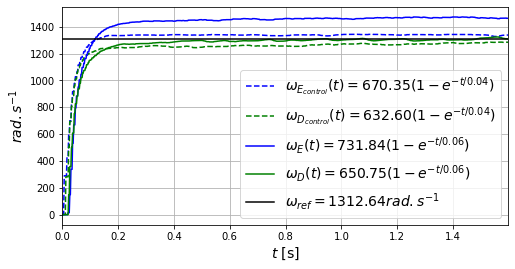

In [29]:
plt.figure(figsize=(8,4))
# plt.title('Com Controlador vs Sem Controlador')

plt.plot(t_c, we_c, '--b', label=r'$\omega_{E_{control}}(t) = %.2f(1 - e^{-t/%.2f})$'%(sp*we_c_opt[0],we_c_opt[1]))
plt.plot(t_c, wd_c, '--g', label=r'$\omega_{D_{control}}(t) = %.2f(1 - e^{-t/%.2f})$'%(sp*wd_c_opt[0],wd_c_opt[1]))

plt.plot(t_c, we, '-b', label=r'$\omega_{E}(t) = %.2f(1 - e^{-t/%.2f})$'%(sp*we_opt[0],we_opt[1]))
plt.plot(t_c, wd, '-g', label=r'$\omega_{D}(t) = %.2f(1 - e^{-t/%.2f})$'%(sp*wd_opt[0],wd_opt[1]))

plt.plot(t_c, wref, '-k', label=r'$\omega_{ref} = %.2f rad.s^{-1}$'%(wref[0]))

plt.xlim([0, motor_e_c['TIME'].max()])
plt.ylabel(r'$rad.s^{-1}$',fontsize=14)
plt.xlabel(r'$t$ [s]',fontsize=14)
plt.grid(True)
plt.legend(prop={'size':14})

plt.savefig('controlador_vs_sem_controlador' + sp_str + '.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


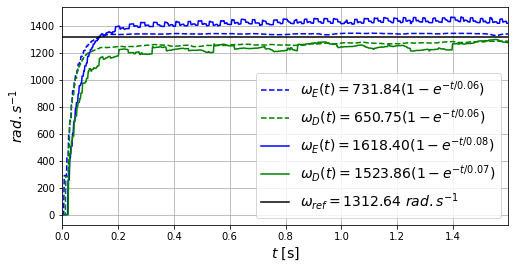

In [30]:
plt.figure(figsize=(8,4))
# plt.title('Antes vs Depois')

plt.plot(t_c, we_c, '--b', label=r'$\omega_{E}(t) = %.2f(1 - e^{-t/%.2f})$'%(sp*we_opt[0],we_opt[1]))
plt.plot(t_c, wd_c, '--g', label=r'$\omega_{D}(t) = %.2f(1 - e^{-t/%.2f})$'%(sp*wd_opt[0],wd_opt[1]))

plt.plot(t_c, we_raw, '-b', label=r'$\omega_{{E}}(t) = %.2f(1 - e^{-t/%.2f})$'%(sp*we_opt_raw[0],we_opt_raw[1]))
plt.plot(t_c, wd_raw, '-g', label=r'$\omega_{{D}}(t) = %.2f(1 - e^{-t/%.2f})$'%(sp*wd_opt_raw[0],wd_opt_raw[1]))

plt.plot(t_c, wref, '-k', label=r'$\omega_{ref} = %.2f$ $rad.s^{-1}$'%(wref[0]))

plt.xlim([0, motor_e_c['TIME'].max()])
plt.ylabel(r'$rad.s^{-1}$', fontsize=14)
plt.xlabel(r'$t$ [s]', fontsize=14)
plt.grid(True)
plt.legend(prop={'size':14})

plt.savefig('antes_vs_depois' + sp_str + '.eps', format='eps')
plt.show()

# Ref. Teórico
## Sistema(Planta):
\begin{equation}
G(s) = \frac{Y(s)}{U(s)} = \frac{K}{T_ms + 1}
\end{equation}

\begin{equation}
y(t) = K(1 - e^{-t/T_m})
\end{equation}

\begin{equation}
\omega(t) = u(t)K\left( 1 - e^{-t/T_m} \right); u(t) \in \left[-1, 1\right]
\end{equation}

## Filtro de Kalman
### Sistema
\begin{equation}
\textbf{x}_k = F_x x_{k-1} + B_k u_k + w_k; w_k \sim N(0, Q_k)
\end{equation}
### Medição
\begin{equation}
z_k = H_k x_k + v_k; v_k \sim N(0, R_k)
\end{equation}

### Predição
$\check{x}_k = F_k \hat{x}_{k-1} + B_k u_k$

$\check{P}_k = F_k \hat{P}_{k-1} F^T_k + Q_k$ 
### Atualização
$K_k = \check{P}_k H^T \left( H_k \check{P}_k H^T_k + R_k\right)^{-1}$

$\hat{x}_k = \check{x}_k + K_k\left( z_k - H_k \check{x}_k \right)$

$\hat{P}_k = \left(I - KH_k \right)\check{P}_k$

## Filtro de Kalman para a nossa planta
\begin{cases}
\textbf{x}_k = \left[ \omega_k \right]\\
z_k = x_k = \omega_k\\
F_k = 1\\
H_k = 1
\end{cases}
### Medição
\begin{align*}
z_k = \omega_z = \frac{N}{\Delta t}.k
\end{align*}

$N$: Números de pulsos;

$k$: Constante para converter de quantidade de pulsos para $rad/s$.
### Predição
\begin{align*}
\check{x}_k &= \hat{x}_{k-1} + (u_k - \hat{x}_{k-1}) \left( 1 - e^{-\frac{\Delta t}{T_m}} \right)\\
\check{x}_k &= \hat{x}_{k-1} +  u^{'}_k \left( 1 - e^{-\frac{\Delta t}{T_m}} \right)\\
\check{P}_k &= \hat{P}_{k-1} + Q_k
\end{align*}

**Obs.:** $\Delta t = t_f - t_0$. $\Delta t$ é relativo ao sinal de entrada $u_k$, sendo $t_0$ o instante que o sinal é aplicado e $t_f$ o instante atual $k$.
### Atualização
\begin{align*}
K_k &= \check{P}_k \left( \check{P}_k + R_k \right)^{-1} = \frac{\check{P}_k}{\check{P}_k + R_k}\\
\hat{x}_k &= \check{x}_k + K_k \left( z_k - \check{x}_k \right)\\
\hat{P}_k &= \left( 1 - K_k \right) \check{P}_k
\end{align*}